# 確率ロボティクスの勉強

## ロボットのシミュレーション

In [1]:
%matplotlib nbagg
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.animation as anm

import math
import numpy as np


In [3]:
class World:
    def __init__(self):
        self.objects = []
    
    def append(self, obj):
        self.objects.append(obj)
    
    def draw(self):
        fig = plt.figure(figsize=(4,4))
        ax = fig.add_subplot(111)
        ax.set_aspect("equal")
        ax.set_xlim(-5, 5)
        ax.set_ylim(-5,5)
        
        for obj in self.objects:
            obj.draw(ax)
        plt.show()
    

<IPython.core.display.Javascript object>


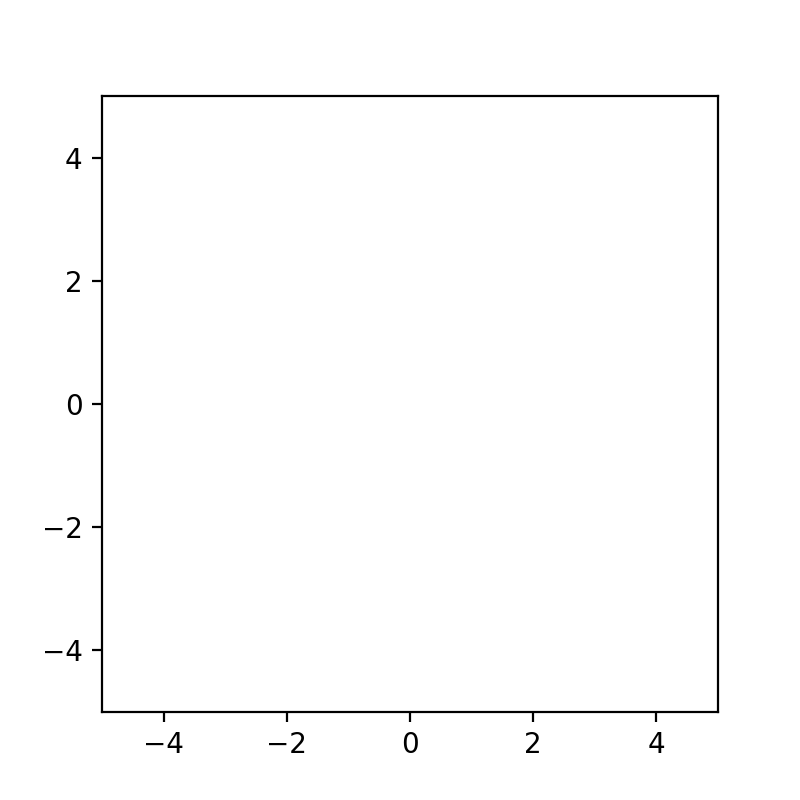

In [4]:
world = World()
world.draw()

In [5]:
class MyRobot:
    def __init__(self, pose, color="red"):
        self.pose = pose
        self.r = 0.2
        self.color = color
    def draw(self, ax):
        x,y = self.pose
        robot = patches.Circle(xy=(x,y), radius=self.r, color=self.color)
        ax.add_patch(robot)

<IPython.core.display.Javascript object>


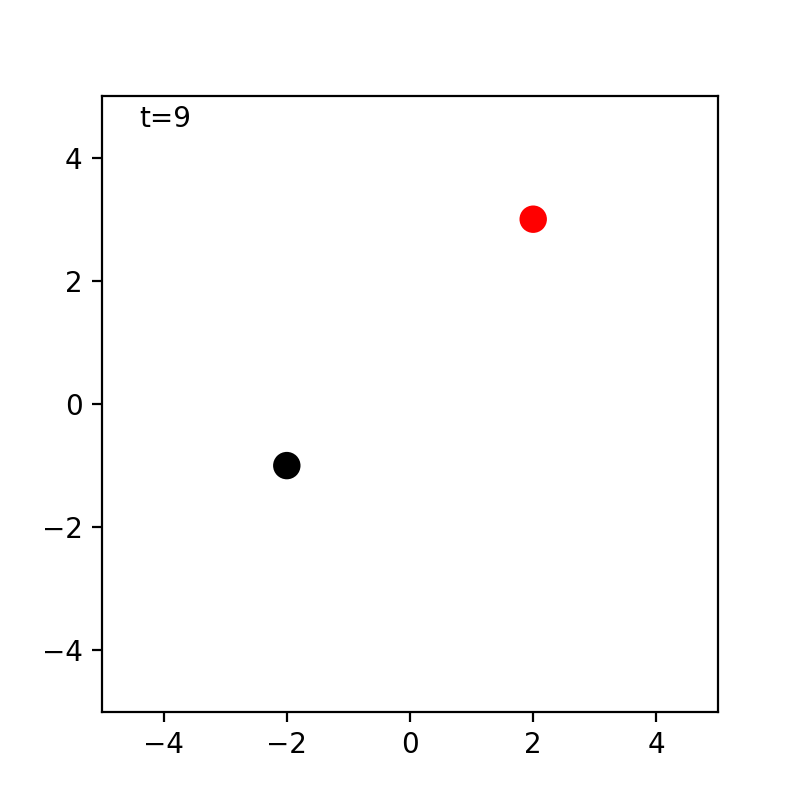

In [25]:
world = World()

robot1 = MyRobot(np.array([2,3]))
robot2 = MyRobot(np.array([-2,-1]), "black")
world.append(robot1)
world.append(robot2)
world.draw()

### アニメーション化

In [11]:
class World:
    def __init__(self):
        self.objects = []
    
    def append(self, obj):
        self.objects.append(obj)
    
    def draw(self):
        fig = plt.figure(figsize=(4,4))
        ax = fig.add_subplot(111)
        ax.set_aspect("equal")
        ax.set_xlim(-5, 5)
        ax.set_ylim(-5, 5)
        
        elems = []
        
        self.ani = anm.FuncAnimation(fig, self.one_step, fargs=(elems, ax), frames=10, interval=1000, repeat=False)
        plt.show()
    
    def one_step(self, i, elems, ax):
        while elems:
            elems.pop().remove()
        elems.append(ax.text(-4.4, 4.5, "t="+str(i), fontsize=10))
        for obj in self.objects:
            obj.draw(ax, elems)

In [23]:
class MyRobot:
    def __init__(self, pose, color="red"):
        self.pose = pose
        self.r = 0.2
        self.color = color
    def draw(self, ax, elems):
        x,y = self.pose
        robot = patches.Circle(xy=(x,y), radius=self.r, color=self.color)
        elems.append(ax.add_patch(robot))

<IPython.core.display.Javascript object>


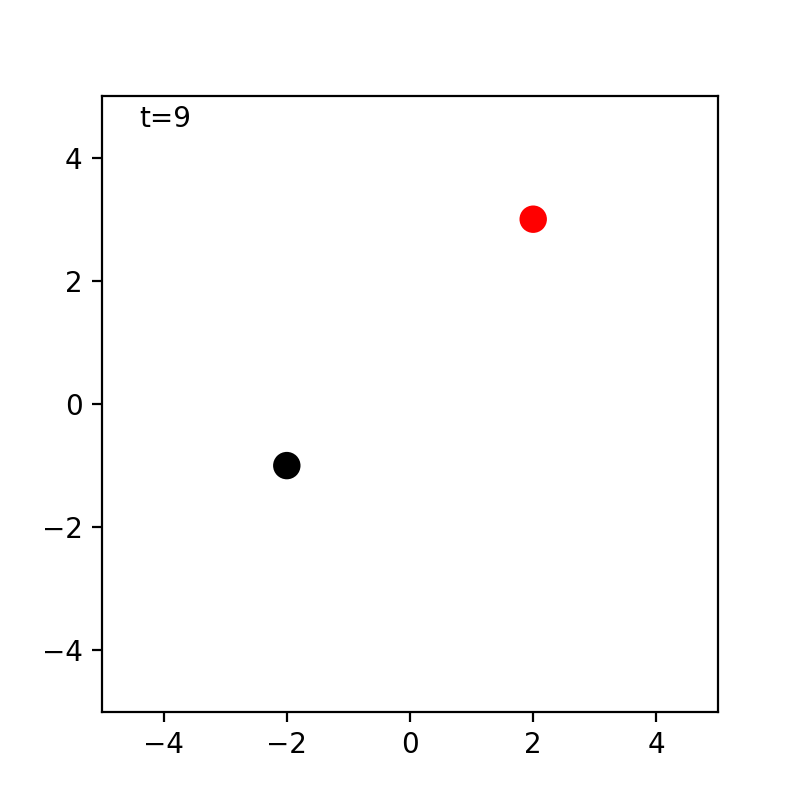

In [24]:
world = World()

robot1 = MyRobot(np.array([2,3]))
robot2 = MyRobot(np.array([-2,-1]), "black")
world.append(robot1)
world.append(robot2)
world.draw()

### 状態遷移の実装

In [21]:
class MyRobot:
    def __init__(self, pose, color="red"):
        self.pose = pose
        self.r = 0.2
        self.color = color
        
    def draw(self, ax, elems):
        x,y = self.pose
        robot = patches.Circle(xy=(x,y), radius=self.r, color=self.color)
        elems.append(ax.add_patch(robot))
        
    def state_transition(self, v_x, v_y, time): #x軸の速度, y軸の速度, 移動時間
        self.pose = self.pose + np.array([v_x*time, v_y*time]) 
    
    

In [31]:
my_robot = MyRobot(np.array([2,3]))
print(my_robot.pose)
my_robot.state_transition(2,3,1)
print(my_robot.pose)

[2 3]
[4 6]


### エージェントの実装

In [120]:
class World:
    def __init__(self, time_span, time_interval, debug=False): #シミュレーション時間, シミュレーション更新周期
        self.objects = []
        self.debug = debug
        self.time_span = time_span
        self.time_interval = time_interval
    
    def append(self, obj):
        self.objects.append(obj)
    
    def draw(self):
        fig = plt.figure(figsize=(4,4))
        ax = fig.add_subplot(111)
        ax.set_aspect("equal")
        ax.set_xlim(-5, 5)
        ax.set_ylim(-5, 5)
        
        elems = []
        
        self.ani = anm.FuncAnimation(fig, self.one_step, fargs=(elems, ax), frames=int(self.time_span/self.time_interval)+1, interval=int(self.time_interval*1000), repeat=False)
        plt.show()
    
    def one_step(self, i, elems, ax):
        while elems:
            elems.pop().remove()
        elems.append(ax.text(-4.4, 4.5, "t="+str(i), fontsize=10))
        for obj in self.objects:
            obj.draw(ax, elems)
            if hasattr(obj, "one_step"):
                obj.one_step(1.0)

In [121]:
class MyRobot:
    def __init__(self, pose, agent=None, color="red"):
        self.pose = pose
        self.r = 0.2
        self.color = color
        self.agent = agent
        self.poses = [] #移動の軌跡を保存
        
    def draw(self, ax, elems):
       
        x,y = self.pose
        robot = patches.Circle(xy=(x,y), radius=self.r, color=self.color)
        elems.append(ax.add_patch(robot))
        
        self.poses.append(np.array([x,y]).T)
        poses_x = [e[0] for e in self.poses]
        poses_y = [e[1] for e in self.poses]
        elems += ax.plot(poses_x, poses_y, linewidth=0.5, color="black")
        
    def state_transition(self, v_x, v_y, time): #x軸の速度, y軸の速度, 移動時間
        self.pose += np.array([v_x*time, v_y*time])
    
    def one_step(self, time_interval):
        if self.agent:
            v_x, v_y = self.agent.decision()
            self.state_transition(v_x, v_y, time_interval)
            

In [122]:
class Agent:
    def __init__(self, v_x, v_y):
        self.v_x = v_x
        self.v_y = v_y
        self.counter =0
    
    def decision(self, observation=None):
        self.counter += 1
        return self.v_x+(self.counter*-0.01), self.v_y+(self.counter*-0.01)

<IPython.core.display.Javascript object>


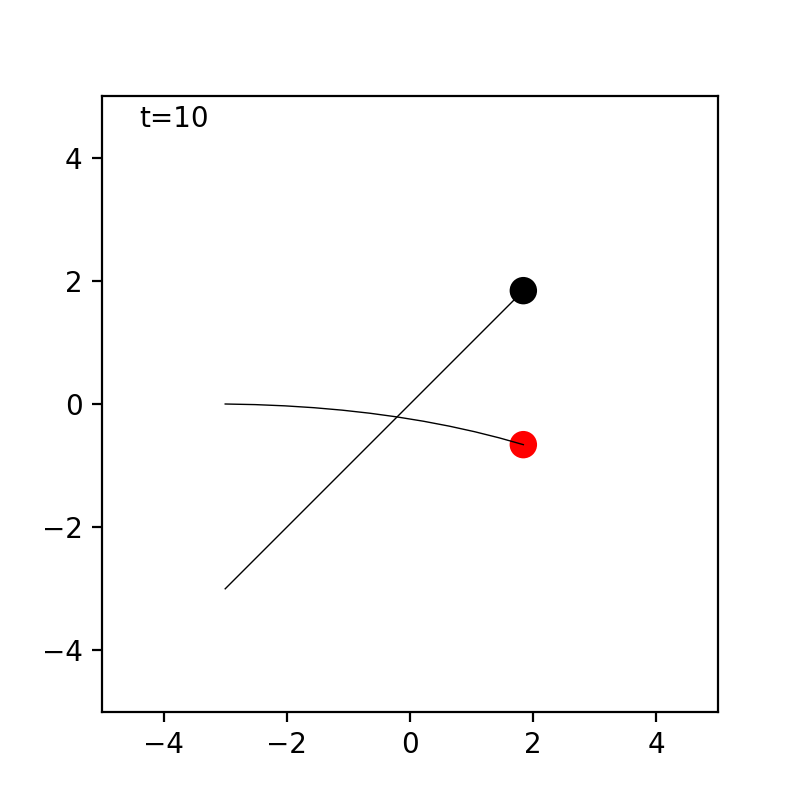

In [119]:
world = World(10,1)
agent1 = Agent(0.5,0.0)
agent2 = Agent(0.5,0.5)
robot1 = MyRobot(np.array([-3.0, 0.0]).T, agent1)
robot2 = MyRobot(np.array([-3.0, -3.0]).T, agent2,"black")
world.append(robot1)
world.append(robot2)
world.draw()

### 点ランドマークの実装 